In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os

os.chdir("../../../test_data/system_tests/proteoforms/mouse_tissues")

In [3]:
RESULTS_DIR = "results_200ng"
EXAMPLE_CONDPAIR = ('brain', 'testis')

In [4]:
import alphaquant.utils.utils as aqutils
list_of_condpairnames = [f.replace('.iontrees.json', '') for f in os.listdir(RESULTS_DIR) if f.endswith('.iontrees.json')]
unique_conds = set([c for cp in list_of_condpairnames for c in cp.split('_VS_')])

list_of_condpairs = [tuple(aqutils.get_condpair_from_condpairname(cp)) for cp in list_of_condpairnames]
print(unique_conds)
print(list_of_condpairs)

{'lungs', 'kidney', 'brain', 'testis', 'spleen'}
[('lungs', 'kidney'), ('lungs', 'spleen'), ('testis', 'spleen'), ('testis', 'kidney'), ('lungs', 'brain'), ('lungs', 'testis'), ('kidney', 'spleen'), ('brain', 'testis'), ('brain', 'kidney'), ('brain', 'spleen')]


In [5]:
import alphaquant.cluster.outlier_scoring as aqoutlier
import alphaquant.utils.utils as aqutils

condpair_tree = aqutils.read_condpair_tree(cond1=EXAMPLE_CONDPAIR[0], cond2=EXAMPLE_CONDPAIR[1], results_folder=RESULTS_DIR)

outlier_handler = aqoutlier.OutlierHandler(condpair_tree)
clusterdiff_list = outlier_handler.get_diffclust_overview_list()

In [43]:
import statistics

def get_fraction_mainclust_per_condpair(list_of_condpairs, results_folder):
    mean_fraction_per_condpair = []

    for condpair in list_of_condpairs:
        condpair_tree = aqutils.read_condpair_tree(cond1=condpair[0], cond2=condpair[1], results_folder=results_folder)
        mainclust_fractions = get_list_of_mainclust_fractions(condpair_tree)
        mean_fraction_per_condpair.append(statistics.mean(mainclust_fractions))
    return mean_fraction_per_condpair


def get_list_of_mainclust_fractions(condpair_tree):
    mainclust_fractions = []
    for protnode in condpair_tree.children:
        mainclust_fractions.append(get_fraction_mainclust(protnode))
    return mainclust_fractions   
    
def get_fraction_mainclust(protnode):
    peptides = protnode.children
    mainclust_count = 0
    for peptide in peptides:
        if peptide.cluster ==0:
            mainclust_count += 1
    return mainclust_count/len(peptides)




mean_fraction_per_condpair = get_fraction_mainclust_per_condpair(list_of_condpairs, RESULTS_DIR)





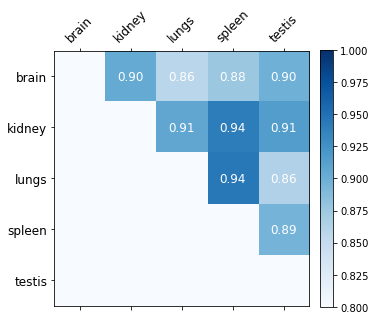

In [79]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# # Given lists
# pairs = [('lungs', 'kidney'), ('lungs', 'spleen'), ('testis', 'spleen'), 
#          ('testis', 'kidney'), ('lungs', 'brain'), ('lungs', 'testis'), 
#          ('kidney', 'spleen'), ('brain', 'testis'), ('brain', 'kidney'), 
#          ('brain', 'spleen')]

# values = [0.5, 0.6, 0.2, 0.8, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]  # Assuming these dummy values

pairs = list_of_condpairs
values = mean_fraction_per_condpair
# Unique tissues, sorted
tissues = sorted(list(set([t for pair in pairs for t in pair])))

# Ensure pairs are in the form (t1, t2) where t1 comes before t2 in the sorted list
sorted_pairs = []
for t1, t2 in pairs:
    if tissues.index(t1) > tissues.index(t2):
        t1, t2 = t2, t1  # swap
    sorted_pairs.append((t1, t2))

# Create an empty matrix
matrix = np.zeros((len(tissues), len(tissues)))

# Fill in the values
for (t1, t2), value in zip(sorted_pairs, values):
    idx1 = tissues.index(t1)
    idx2 = tissues.index(t2)
    matrix[idx1, idx2] = value

# Create a custom colormap
cmap = plt.cm.coolwarm
my_cmap = cmap(np.arange(cmap.N))
my_cmap[0, :3] = 1.0  # Set the RGB values of the first entry (i.e., zero values) to white
my_cmap = ListedColormap(my_cmap)

# Plot
fig, ax = plt.subplots(figsize=(5, 6))
cax = ax.matshow(matrix, cmap='Blues', vmin = 0.8, vmax = 1)
fig.colorbar(cax, fraction=0.046, pad=0.04)
ax.set_xticks(np.arange(len(tissues)),)
ax.set_yticks(np.arange(len(tissues)), )
ax.set_xticklabels(tissues, rotation=45,  fontsize=12)
ax.set_yticklabels(tissues, fontsize=12)

# Annotate each cell with the numeric value
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        if matrix[i, j] != 0:
            ax.text(j, i, f"{matrix[i, j]:.2f}", va='center', ha='center', color='black' if matrix[i, j] < 0.7 else 'white', fontsize=12)

plt.show()

fig.savefig('heatmap_mainclust_fraction_per_condpair.pdf', dpi=300, bbox_inches='tight')




In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Given lists
pairs = [('lungs', 'kidney'), ('lungs', 'spleen'), ('testis', 'spleen'), 
         ('testis', 'kidney'), ('lungs', 'brain'), ('lungs', 'testis'), 
         ('kidney', 'spleen'), ('brain', 'testis'), ('brain', 'kidney'), 
         ('brain', 'spleen')]

values = [0.5, 0.6, 0.2, 0.8, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]  # Assuming these dummy values

# Unique tissues, sorted
tissues = sorted(list(set([t for pair in pairs for t in pair])))

# Ensure pairs are in the form (t1, t2) where t1 comes before t2 in the sorted list
sorted_pairs = []
for t1, t2 in pairs:
    if tissues.index(t1) > tissues.index(t2):
        t1, t2 = t2, t1  # swap
    sorted_pairs.append((t1, t2))

# Create an empty matrix
matrix = np.zeros((len(tissues), len(tissues)))

# Fill in the values
for (t1, t2), value in zip(sorted_pairs, values):
    idx1 = tissues.index(t1)
    idx2 = tissues.index(t2)
    matrix[idx1, idx2] = value

# Adjust color range to data range
data_min = min(values)
data_max = max(values)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(matrix, cmap='Blues', vmin=data_min, vmax=data_max)

# Adjust colorbar size and position
cbar = fig.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=12)  # Increase font size for colorbar ticks

# Set tick labels and font size
ax.set_xticks(np.arange(len(tissues)))
ax.set_yticks(np.arange(len(tissues)))
ax.set_xticklabels(tissues, rotation=45, fontsize=12)  # Increased font size
ax.set_yticklabels(tissues, fontsize=12)  # Increased font size

# Set title with increased font size
ax.set_title('Heatmap of Mean Fraction of Main Cluster', pad=20, fontsize=14)

# Annotate each cell with the numeric value with increased font size
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        if matrix[i, j] != 0:
            ax.text(j, i, f"{matrix[i, j]:.2f}", va='center', ha='center', fontsize=10, color='black' if matrix[i, j] < 0.7 else 'white')

plt.tight_layout()
plt.show()
